Environment and Q-Learning Agent


Path taken: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


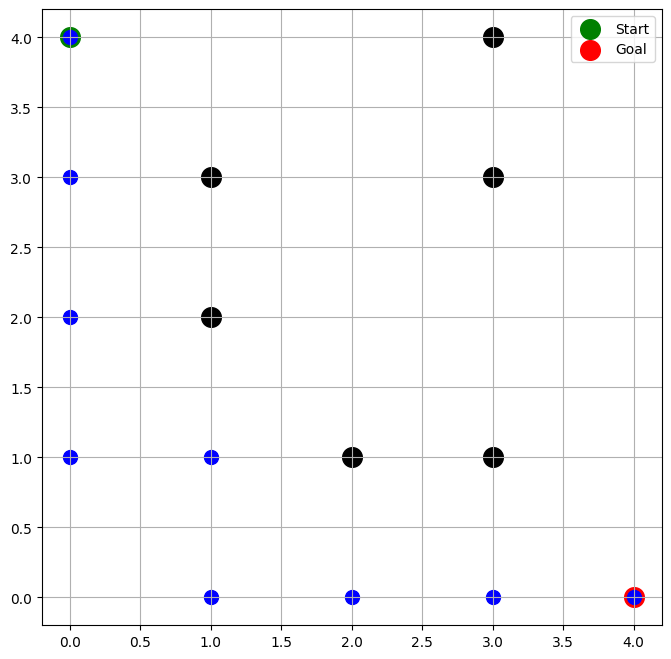

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the maze environment
class Maze:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = ['up', 'down', 'left', 'right']
        self.rows, self.cols = grid.shape

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 'up': row = max(row - 1, 0)
        elif action == 'down': row = min(row + 1, self.rows - 1)
        elif action == 'left': col = max(col - 1, 0)
        elif action == 'right': col = min(col + 1, self.cols - 1)

        if self.grid[row, col] == 1:  # Obstacle
            return self.state, -10, False

        self.state = (row, col)
        if self.state == self.goal:
            return self.state, 100, True
        return self.state, -1, False

# Q-Learning Agent
class QLearningAgent:
    def __init__(self, maze, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.maze = maze
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((maze.rows, maze.cols, len(maze.actions)))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(range(len(self.maze.actions)))
        return np.argmax(self.q_table[state[0], state[1]])

    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state[0], state[1], action]
        max_next_q = np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (reward + self.gamma * max_next_q - current_q)

    def train(self, episodes=500):
        for episode in range(episodes):
            state = self.maze.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.maze.step(self.maze.actions[action])
                self.learn(state, action, reward, next_state)
                state = next_state

# Visualization
def plot_maze(maze, path=None):
    plt.figure(figsize=(8, 8))
    for i in range(maze.rows):
        for j in range(maze.cols):
            if maze.grid[i, j] == 1:
                plt.scatter(j, maze.rows - i - 1, c='black', s=200)
    plt.scatter(maze.start[1], maze.rows - maze.start[0] - 1, c='green', label='Start', s=200)
    plt.scatter(maze.goal[1], maze.rows - maze.goal[0] - 1, c='red', label='Goal', s=200)
    if path:
        for (x, y) in path:
            plt.scatter(y, maze.rows - x - 1, c='blue', s=100)
    plt.legend()
    plt.grid()
    plt.show()

# Main Execution
if __name__ == "__main__":
    grid = np.array([
        [0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0],
    ])
    start = (0, 0)
    goal = (4, 4)

    maze = Maze(grid, start, goal)
    agent = QLearningAgent(maze)
    agent.train(episodes=1000)

    # Test the agent
    state = maze.reset()
    path = [state]
    done = False
    while not done:
        action = agent.choose_action(state)
        state, _, done = maze.step(maze.actions[action])
        path.append(state)

    print("Path taken:", path)
    plot_maze(maze, path)
